## Tarea S8.01. Visualitzacions en Python

### Nivel 01

##### Conexión con la base de datos MySQL

In [2]:
#Importamos la librería para leer el fichero con los datos de conexión a la base de datos:
import os
from dotenv import load_dotenv

#Importamos las librerías necesarias para manejar los datos y crear las gráficas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importamos las librerías necesarias para la conexión con la base de datos:

import mysql.connector as sql
from mysql.connector import Error

from sqlalchemy import create_engine

Conectamos con la base de datos 'transactions_alex' en MySQL Workbench. Para ello, recuperamos las credenciales que guardamos en un archivo de entorno .env en la raíz del proyecto.

In [5]:
# Load variables from .env file
load_dotenv()
# Access the variables
usuario = os.getenv("usuario")
clave = os.getenv("clave")
host = os.getenv("host")
db = os.getenv("db")
print(f"Your host is: {host}")
print(f"User is: {usuario}")
print(f"Password is: {clave}")
print(f"Database is: {db}")


Your host is: localhost
User is: root
Password is: root
Database is: transactions_alex


In [6]:

#Importamos los datos de nuestra base de datos:
try:
    db_transactions = sql.connect(host = host,
                                         database = db,
                                         user = usuario,
                                         password = clave)
    
    #Nos aseguramos de que se realiza la conexión con MySQL Server y con la base de datos:
    if db_transactions.is_connected():
        db_Info = db_transactions.get_server_info()
        print(f"Conectado con la version {db_Info} de MySQL Server")
        cursor = db_transactions.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print(f"Conexión establecida con la base de datos {record[0]}")

    #Recuperamos el nombre de las tablas de la base de datos y los guardamos en una lista:
    query_tablas = """SHOW tables"""
    cursor.execute(query_tablas)
    tablas = cursor.fetchall()
    print(tablas)

    #Creamos un diccionario que contendrá un dataframe por elemento, y cuyo índice será el nombre de la tabla correspondiente:
    
    dataframe = {}
    nombres_tablas = []

    #Usamos SQLAlchemy para obtener los registros y los nombres de las columnas de cada tabla:
    conexion = create_engine(f'mysql+mysqlconnector://{usuario}:{clave}@{host}/{db}')

    for tabla in tablas:
        nombre_tabla = tabla[0]
        nombres_tablas.append(nombre_tabla)
        query = f'SELECT * FROM {nombre_tabla}'
        dataframe[nombre_tabla] = pd.read_sql(query,conexion)      
        print(f'Tabla {nombre_tabla}: \n', dataframe[nombre_tabla].head(), '\n') #Comprobación de que recuperamos correctamente las tablas de la BBDD


#Manejamos los posibles errores de sesión
except Error as e:
    print("Error en la conexión a MySQL:", e)
    
#Cerramos el cursor y la conexión    
finally:
    if db_transactions.is_connected():
        cursor.close()
        db_transactions.close()
        print("Conexión a MySQL cerrada")

Conectado con la version 8.4.0 de MySQL Server
Conexión establecida con la base de datos transactions_alex
[('company',), ('credit_card',), ('credit_card_status',), ('product',), ('transaction',), ('transaction_products',), ('user',)]
Tabla company: 
        id                 company_name           phone  \
0  b-2222    Ac Fermentum Incorporated  06 85 56 52 33   
1  b-2226     Magna A Neque Industries  04 14 44 64 62   
2  b-2230                  Fusce Corp.  08 14 97 58 85   
3  b-2234    Convallis In Incorporated  06 66 57 29 50   
4  b-2238  Ante Iaculis Nec Foundation  08 23 04 99 53   

                              email        country  \
0  donec.porttitor.tellus@yahoo.net        Germany   
1       risus.donec.nibh@icloud.org      Australia   
2              risus@protonmail.edu  United States   
3                mauris.ut@aol.couk        Germany   
4       sed.dictum.proin@outlook.ca    New Zealand   

                            website  
0      https://instagram.com/site\r 

Observamos que en la tabla product el precio está en formato texto y precedido por el símbolo $. Vamos a transformarlo a numérico.

In [7]:
df_product = dataframe['product']
df_product['price'] = df_product['price'].str.replace('$','')
df_product['price'] = df_product['price'].astype(float)
df_product.head(10)

,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4
1,10,Karstark Dorne,119.52,#f4f4f4,2.4,WH--5
2,100,south duel,40.43,#6d6d6d,3.0,WH--95
3,11,Karstark Dorne,49.70,#141414,2.7,WH--6
4,12,duel Direwolf,181.60,#a8a8a8,2.1,WH--7
5,13,palpatine chewbacca,139.59,#2b2b2b,1.0,WH--8
6,14,Direwolf,147.53,#c4c4c4,2.0,WH--9
7,15,Stannis warden,194.29,#dbdbdb,1.5,WH--10
8,16,the duel warden,180.91,#666666,3.0,WH--11
9,17,skywalker ewok sith,91.89,#7c7c7c,3.2,WH--12


### Ejercicio 1

##### Gráfico con una variable numérica

Vamos a analizar el número de operaciones según rango de importes para aquellas transacciones efectivas (declined = 0)

In [8]:
#Para facilitar la lectura, definiremos los dataframes de cada tabla haciendo referencia a su clave en el diccionario de dataframes. Empezamos con la tabla 'transaction': 
df_transaction = dataframe['transaction']

#Queremos ver la distribución de los datos numéricos de la tabla:
df_transaction_ok = df_transaction[df_transaction['declined'] == 0]
df_transaction_ok.describe()

,timestamp,amount,declined,latitude,longitude
count,500,500.00000,500.0,500.000000,500.000000
mean,2021-09-10 10:45:47.573999872,259.01118,0.0,0.449181,-4.356967
min,2021-03-17 02:55:49,15.05000,0.0,-89.824800,-179.366000
25%,2021-06-11 09:47:49,136.19250,0.0,-44.190900,-100.175500
50%,2021-09-04 14:13:29,262.47000,0.0,0.152780,-5.848405
75%,2021-12-16 19:01:35,390.84750,0.0,45.005125,87.920300
max,2022-03-16 14:01:36,499.23000,0.0,89.921200,179.950000
std,NaN,143.13700,0.0,51.665107,106.374824


In [9]:
#Vamos a sacar algunas estadísticas sobre los ingresos y a graficarlas:
amount = df_transaction_ok['amount']

media = amount.mean()
mediana = amount.median()
percentil_25 = np.percentile(amount,25)
percentil_75 = np.percentile(amount,75)

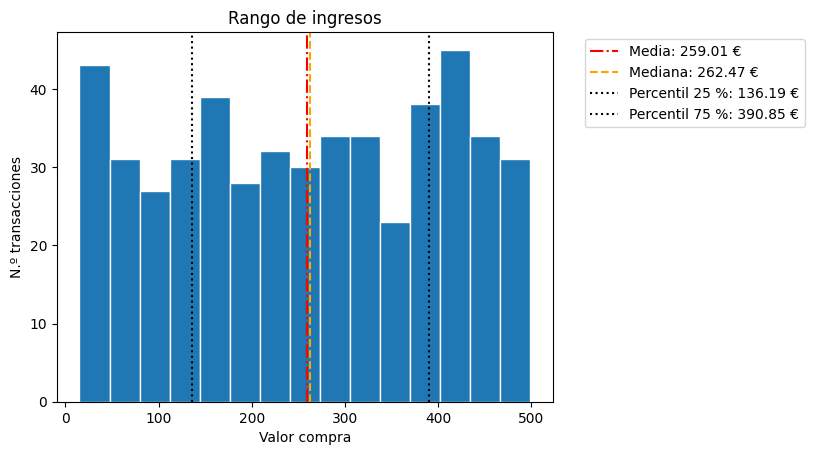

In [10]:
fig, ax = plt.subplots()

ax.hist(amount, bins=15, edgecolor="white")
ax.axvline(media, color="red", ls="-.", label=f"Media: {round(media,2)} €")
ax.axvline(mediana, color="orange", ls="--", label=f"Mediana: {round(mediana,2)} €")
ax.axvline(percentil_25, color="black", ls=":", label=f"Percentil 25 %: {round(percentil_25,2)} €")
ax.axvline(percentil_75, color="black", ls=":", label=f"Percentil 75 %: {round(percentil_75,2)} €")
ax.set_title('Rango de ingresos')
ax.set_xlabel('Valor compra')
ax.set_ylabel('N.º transacciones')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Vemos que no hay mucha diferencia entre el valor medio de los importes de las transacciones y la mediana; apenas una pequeña tendencia hacia transacciones de bajo importe, como se ve en la izquierda de la gráfica, compensado por una distribución homogénea entre 150 y 350 euros, y una elevada cantidad de transacciones por encima de los 400 euros.

Interesaría, por un lado, fidelizar a los clientes con compras más elevadas, ofreciendo ofertas u abonos para animar a adquirir más productos, y, por otro lado, promocionar los artículos más caros para aumentar el tícket de las posibles compras puntuales. 

### Ejercicio 2

##### Gráfico con dos variables numéricas

Queremos visualizar los patrones de compra por edad.

In [11]:
#Vamos a calcular la edad de los usuarios y a añadirla al dataframe 'user':
from datetime import date
from datetime import datetime

df_usuario = dataframe['user']
df_usuario.head(10)

,id,name,surname,phone,email,birth_date,country,city,postal_code,address
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,"Nov 17, 1985",United States,Lowell,73544,348-7818 Sagittis St.
1,10,Robert,Mccarthy,(324) 746-6771,fermentum@protonmail.com,"Apr 30, 1984",United States,Eugene,85526,"P.O. Box 773, 3594 Ornare St."
2,100,Melodie,Mclean,1-677-221-7152,risus.varius@google.ca,"Sep 15, 1989",United States,College,11838,Ap #644-8492 Sagittis St.
3,101,Sarah,Beck,(358) 691-4345,vitae.risus@aol.couk,"Apr 9, 1983",United States,Great Falls,67129,"665-9047 In, Rd."
4,102,Jasper,Landry,1-397-765-1118,consectetuer.euismod@aol.org,"Apr 16, 1982",United States,Columbus,11595,Ap #374-7325 Sodales Rd.
5,103,Upton,Chavez,(227) 785-6484,euismod.est@aol.ca,"Mar 15, 1986",United States,Essex,95631,"1990 Vel, Av."
6,104,Martha,Barlow,(732) 326-5448,vulputate@hotmail.net,"Oct 29, 1988",United States,Chicago,41512,Ap #311-7103 In Avenue
7,105,Hashim,Rose,(858) 313-6727,urna@icloud.com,"Mar 28, 1983",United States,Tacoma,99632,"8034 Tortor, Road"
8,106,Tanner,Valenzuela,1-346-421-3135,nascetur.ridiculus@google.net,"Apr 6, 1993",United States,Naperville,31130,Ap #114-2616 Fusce Road
9,107,Victor,Valencia,(239) 569-1938,non.enim@hotmail.couk,"May 1, 1998",United States,Warren,15158,Ap #182-9926 At St.


In [12]:
#Transformamos la fecha de nacimiento a formato datetime
df_usuario['birth_date'] = pd.to_datetime(df_usuario['birth_date'])
df_usuario.head(10)


,id,name,surname,phone,email,birth_date,country,city,postal_code,address
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,1985-11-17,United States,Lowell,73544,348-7818 Sagittis St.
1,10,Robert,Mccarthy,(324) 746-6771,fermentum@protonmail.com,1984-04-30,United States,Eugene,85526,"P.O. Box 773, 3594 Ornare St."
2,100,Melodie,Mclean,1-677-221-7152,risus.varius@google.ca,1989-09-15,United States,College,11838,Ap #644-8492 Sagittis St.
3,101,Sarah,Beck,(358) 691-4345,vitae.risus@aol.couk,1983-04-09,United States,Great Falls,67129,"665-9047 In, Rd."
4,102,Jasper,Landry,1-397-765-1118,consectetuer.euismod@aol.org,1982-04-16,United States,Columbus,11595,Ap #374-7325 Sodales Rd.
5,103,Upton,Chavez,(227) 785-6484,euismod.est@aol.ca,1986-03-15,United States,Essex,95631,"1990 Vel, Av."
6,104,Martha,Barlow,(732) 326-5448,vulputate@hotmail.net,1988-10-29,United States,Chicago,41512,Ap #311-7103 In Avenue
7,105,Hashim,Rose,(858) 313-6727,urna@icloud.com,1983-03-28,United States,Tacoma,99632,"8034 Tortor, Road"
8,106,Tanner,Valenzuela,1-346-421-3135,nascetur.ridiculus@google.net,1993-04-06,United States,Naperville,31130,Ap #114-2616 Fusce Road
9,107,Victor,Valencia,(239) 569-1938,non.enim@hotmail.couk,1998-05-01,United States,Warren,15158,Ap #182-9926 At St.


In [13]:
#Calculamos la edad restando de Timestamp('now') la cantidad de días de cada usuario y dividiendo por el número de días/año, y lo añadimos a la tabla:
df_usuario['age'] = (pd.Timestamp('now') - df_usuario['birth_date']).dt.days // 365
df_usuario.head(10)

,id,name,surname,phone,email,birth_date,country,city,postal_code,address,age
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,1985-11-17,United States,Lowell,73544,348-7818 Sagittis St.,39
1,10,Robert,Mccarthy,(324) 746-6771,fermentum@protonmail.com,1984-04-30,United States,Eugene,85526,"P.O. Box 773, 3594 Ornare St.",40
2,100,Melodie,Mclean,1-677-221-7152,risus.varius@google.ca,1989-09-15,United States,College,11838,Ap #644-8492 Sagittis St.,35
3,101,Sarah,Beck,(358) 691-4345,vitae.risus@aol.couk,1983-04-09,United States,Great Falls,67129,"665-9047 In, Rd.",41
4,102,Jasper,Landry,1-397-765-1118,consectetuer.euismod@aol.org,1982-04-16,United States,Columbus,11595,Ap #374-7325 Sodales Rd.,42
5,103,Upton,Chavez,(227) 785-6484,euismod.est@aol.ca,1986-03-15,United States,Essex,95631,"1990 Vel, Av.",38
6,104,Martha,Barlow,(732) 326-5448,vulputate@hotmail.net,1988-10-29,United States,Chicago,41512,Ap #311-7103 In Avenue,36
7,105,Hashim,Rose,(858) 313-6727,urna@icloud.com,1983-03-28,United States,Tacoma,99632,"8034 Tortor, Road",41
8,106,Tanner,Valenzuela,1-346-421-3135,nascetur.ridiculus@google.net,1993-04-06,United States,Naperville,31130,Ap #114-2616 Fusce Road,31
9,107,Victor,Valencia,(239) 569-1938,non.enim@hotmail.couk,1998-05-01,United States,Warren,15158,Ap #182-9926 At St.,26


In [14]:
#Vamos a hacer una join entre los dataframes 'transaction' y 'user'. Para evitar sufijos en los campos de las columnas, renombramos la columna id de user previo a la join:
df_usuario = df_usuario.rename(columns={'id': 'user_id'})
df_usuario.head(10)

,user_id,name,surname,phone,email,birth_date,country,city,postal_code,address,age
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,1985-11-17,United States,Lowell,73544,348-7818 Sagittis St.,39
1,10,Robert,Mccarthy,(324) 746-6771,fermentum@protonmail.com,1984-04-30,United States,Eugene,85526,"P.O. Box 773, 3594 Ornare St.",40
2,100,Melodie,Mclean,1-677-221-7152,risus.varius@google.ca,1989-09-15,United States,College,11838,Ap #644-8492 Sagittis St.,35
3,101,Sarah,Beck,(358) 691-4345,vitae.risus@aol.couk,1983-04-09,United States,Great Falls,67129,"665-9047 In, Rd.",41
4,102,Jasper,Landry,1-397-765-1118,consectetuer.euismod@aol.org,1982-04-16,United States,Columbus,11595,Ap #374-7325 Sodales Rd.,42
5,103,Upton,Chavez,(227) 785-6484,euismod.est@aol.ca,1986-03-15,United States,Essex,95631,"1990 Vel, Av.",38
6,104,Martha,Barlow,(732) 326-5448,vulputate@hotmail.net,1988-10-29,United States,Chicago,41512,Ap #311-7103 In Avenue,36
7,105,Hashim,Rose,(858) 313-6727,urna@icloud.com,1983-03-28,United States,Tacoma,99632,"8034 Tortor, Road",41
8,106,Tanner,Valenzuela,1-346-421-3135,nascetur.ridiculus@google.net,1993-04-06,United States,Naperville,31130,Ap #114-2616 Fusce Road,31
9,107,Victor,Valencia,(239) 569-1938,non.enim@hotmail.couk,1998-05-01,United States,Warren,15158,Ap #182-9926 At St.,26


In [15]:
df_transaction_user = pd.merge(df_transaction, df_usuario, on='user_id', how='inner')
df_transaction_user.head()

,id,credit_card_id,company_id,timestamp,amount,declined,product_ids,user_id,latitude,longitude,name,surname,phone,email,birth_date,country,city,postal_code,address,age
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,Lynn,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",40
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,William,Benjamin,0800 1111,porttitor@icloud.ca,1987-05-15,United Kingdom,Coldstream,KY0 0DY,662-8112 Praesent Av.,37
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0500,Kenyon,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,1982-08-03,Canada,Richmond,R8H 2K2,8564 Facilisi. St.,42
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5560,Chloe,Keith,022-178-1548,arcu.eu@protonmail.org,1999-01-10,Canada,Oliver,B5T 7L6,"P.O. Box 289, 3192 Cursus St.",26
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2980,Lynn,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",40


Text(0.5, 1.0, 'Importe transacciones por edad')

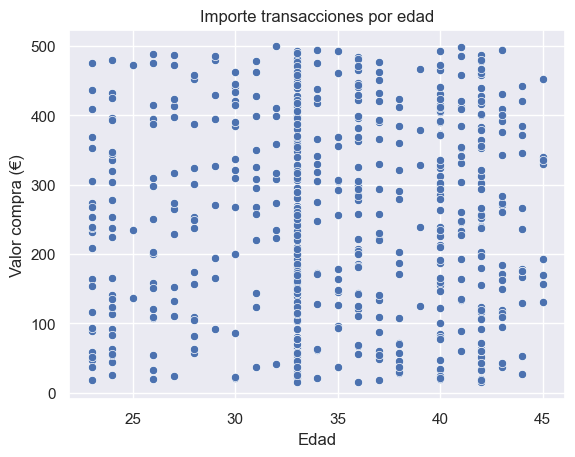

In [16]:
sns.set_theme(style="darkgrid")
sns.scatterplot(y=df_transaction_user['amount'], x=df_transaction_user['age'])
plt.xlabel('Edad')
plt.ylabel('Valor compra (€)')
plt.title('Importe transacciones por edad')

Vemos que no hay ninguna relación aparente entre la edad de los compradores y el importe, ya que los puntos aparecen muy dispersos.

La cantidad de puntos para los usuarios de 33 años nos hace sospechar que quizá haya un usuario muy activo con esta edad. Vamos a ver cuántas operaciones realizan los usuarios con esa edad.

In [17]:
df_transaction_user[df_transaction_user['age']==33].groupby('user_id').agg({"surname": "first", "name": "first", "id": "count"})

,surname,name,id
user_id,,,
147,Talley,Brody,1
194,Francis,Porter,2
196,Duke,Blaze,2
209,Malone,Athena,2
247,Case,Olga,2
267,Nelson,Ocean,52
271,Cherry,Leandra,4
272,Gilbert,Hedwig,76
89,Mercado,Lars,1


Vemos que el usuario Hedwig Gilbert ha realizado 76 compras durante el periodo, y Ocean Nelson, 52. Vamos a volver a dibujar la gráfica de dispersión excluyendo a estos compradores y, de paso, rotamos los ejes para una mejor visualización:

Text(0.5, 1.0, 'Importe transacciones por edad')

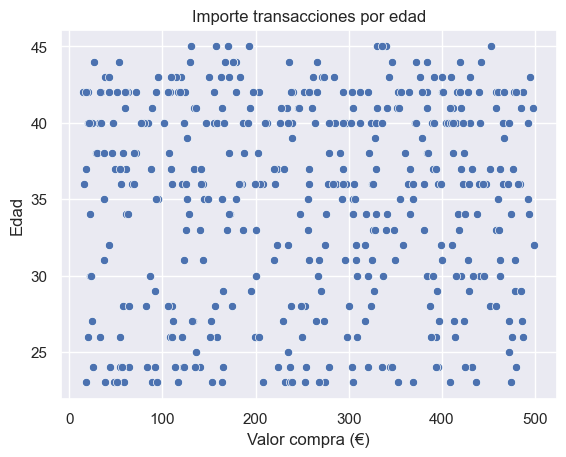

In [18]:
lista_apellidos = ('Gilbert', 'Nelson')

sns.scatterplot(x=df_transaction_user[~df_transaction_user['surname'].isin(lista_apellidos)].amount, y=df_transaction_user['age'])
plt.ylabel('Edad')
plt.xlabel('Valor compra (€)')
plt.title('Importe transacciones por edad')

Aun así, vemos que no hay relación entre la edad y el valor medio de compra.

### Ejercicio 3

##### Gráfico con una variable categórica

Queremos saber cuántas empresas operan por país.

In [19]:
df_company = dataframe['company']
df_company.head()


,id,company_name,phone,email,country,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site\r
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9\r
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars\r
3,b-2234,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110\r
4,b-2238,Ante Iaculis Nec Foundation,08 23 04 99 53,sed.dictum.proin@outlook.ca,New Zealand,https://netflix.com/settings\r


Text(0, 0.5, 'País')

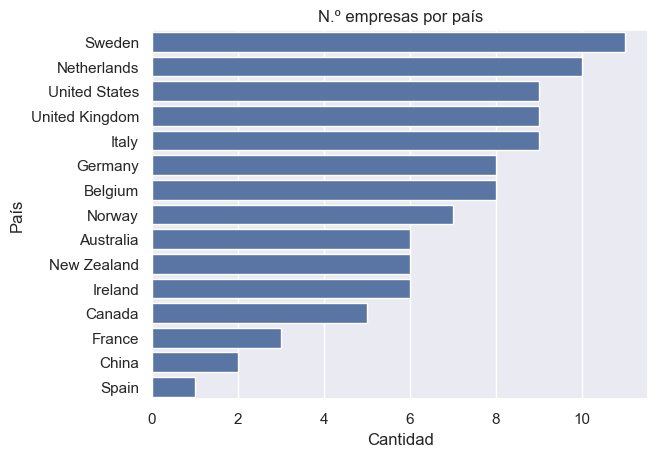

In [20]:
sns.countplot(data=df_company, y='country', order = df_company['country'].value_counts().index)

plt.title('N.º empresas por país')
plt.xlabel('Cantidad')
plt.ylabel('País')


Los países con mayor número de empresas que operan con nosotros son Suecia, Países Bajos, Italia, Reino Unido y Estados Unidos.

### Ejercicio 4

##### Gráfico con una variable categórica y una numérica

Vamos a estudiar la evolución de las transacciones y las ventas por periodo.

In [21]:
#Añadimos el periodo al dataframe 'transaction'
df_transaction['period'] = df_transaction['timestamp'].dt.to_period('M')
df_transaction.head()

,id,credit_card_id,company_id,timestamp,amount,declined,product_ids,user_id,latitude,longitude,period
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,2021-08
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,2021-07
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0500,2022-01
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5560,2022-01
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2980,2021-10


In [22]:
#Agrupamos el importe de las transacciones (tanto válidas como rechazadas) por periodo:
transacciones_mensuales = df_transaction['amount'].groupby([df_transaction['period']]).sum()
print(transacciones_mensuales)
transacciones_mensuales.describe()

period
2021-03     6471.66
2021-04    15980.23
2021-05    15364.17
2021-06    14241.19
2021-07    11373.93
2021-08    15608.04
2021-09    10503.32
2021-10    12281.17
2021-11     8888.91
2021-12    15162.07
2022-01     8990.02
2022-02    10941.42
2022-03     4897.62
Freq: M, Name: amount, dtype: float64


count       13.000000
mean     11592.596154
std       3612.692881
min       4897.620000
25%       8990.020000
50%      11373.930000
75%      15162.070000
max      15980.230000
Name: amount, dtype: float64

In [23]:
#Realizamos una agrupación similar solo para las transacciones aceptadas:
ventas_mensuales = df_transaction_ok['amount'].groupby([df_transaction['period']]).sum()
print(ventas_mensuales)
ventas_mensuales.describe()

period
2021-03     5711.35
2021-04    13507.68
2021-05    11659.27
2021-06    10817.81
2021-07     9931.77
2021-08    13900.24
2021-09     9524.43
2021-10    10765.57
2021-11     7675.74
2021-12    14177.16
2022-01     8236.31
2022-02    10077.55
2022-03     3520.71
Freq: M, Name: amount, dtype: float64


count       13.000000
mean      9961.968462
std       3136.837340
min       3520.710000
25%       8236.310000
50%      10077.550000
75%      11659.270000
max      14177.160000
Name: amount, dtype: float64

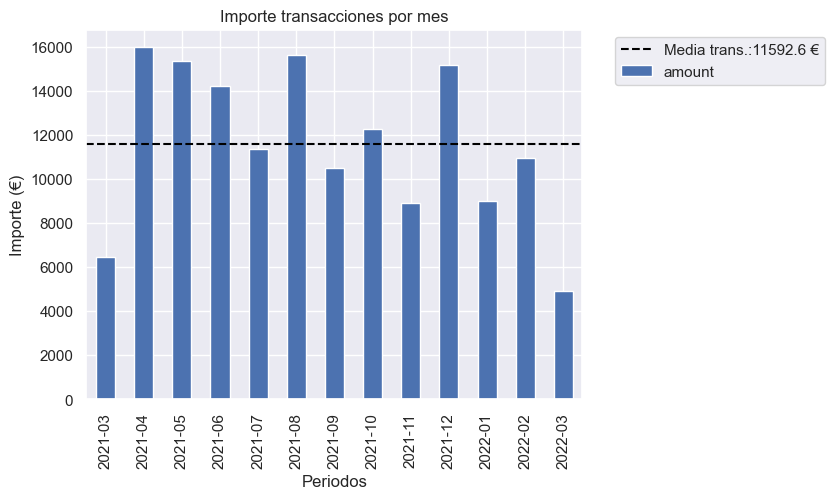

In [24]:
#Graficamos la evolución de los importes totales de las transacciones por periodo:
media_transacciones = transacciones_mensuales.mean()

ax = transacciones_mensuales.plot(kind='bar')
ax.axhline(y=media_transacciones, color='black', linestyle='--', label=f'Media trans.:{round(media_transacciones,2)} €')
ax.set_title('Importe transacciones por mes')
ax.set_ylabel('Importe (€)')
ax.set_xlabel('Periodos')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Los meses con mayor importe de transacciones realizadas corresponde a los meses de abril, agosto, mayo, diciembre, junio y septiembre del 2021, superando todos los 12.000 euros de importe. Pero, a continuación, vamos a ver qué importes se materializaron:

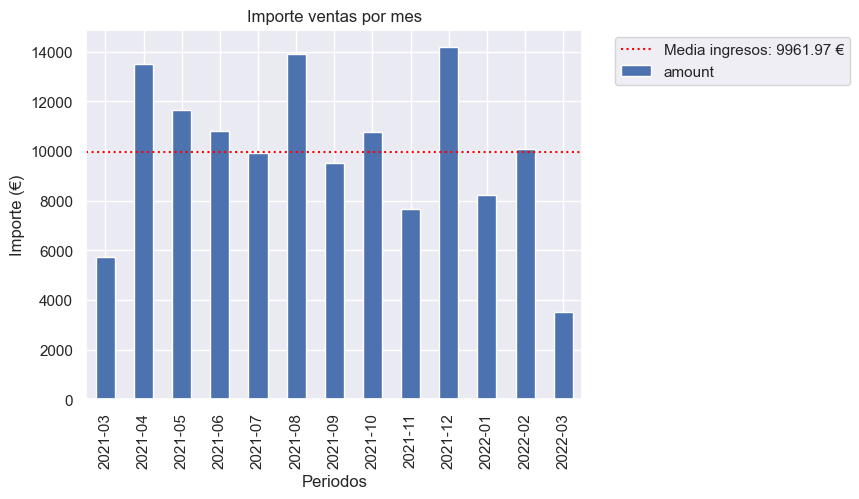

In [25]:
media_ventas = ventas_mensuales.mean()

ax = ventas_mensuales.plot(kind='bar')
ax.axhline(y=media_ventas, color='red', linestyle=':', label=f'Media ingresos: {round(media_ventas,2)} €')
ax.set_title('Importe ventas por mes')
ax.set_ylabel('Importe (€)')
ax.set_xlabel('Periodos')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

En los meses de abril y agosto se dejó de ingresar, a causa de las transacciones rechazadas, cerca de 2.000 euros; y el mes con mayores ingresos fue el mes de diciembre, que sufrió un menor impacto a causa de las transacciones rechazadas.

Si unimos ambas gráficas de barras en una sola gráfica (lo que implica añadir una variable categórica más, si la operación fue aceptada o declinada), podemos comparar mejor la diferencia.

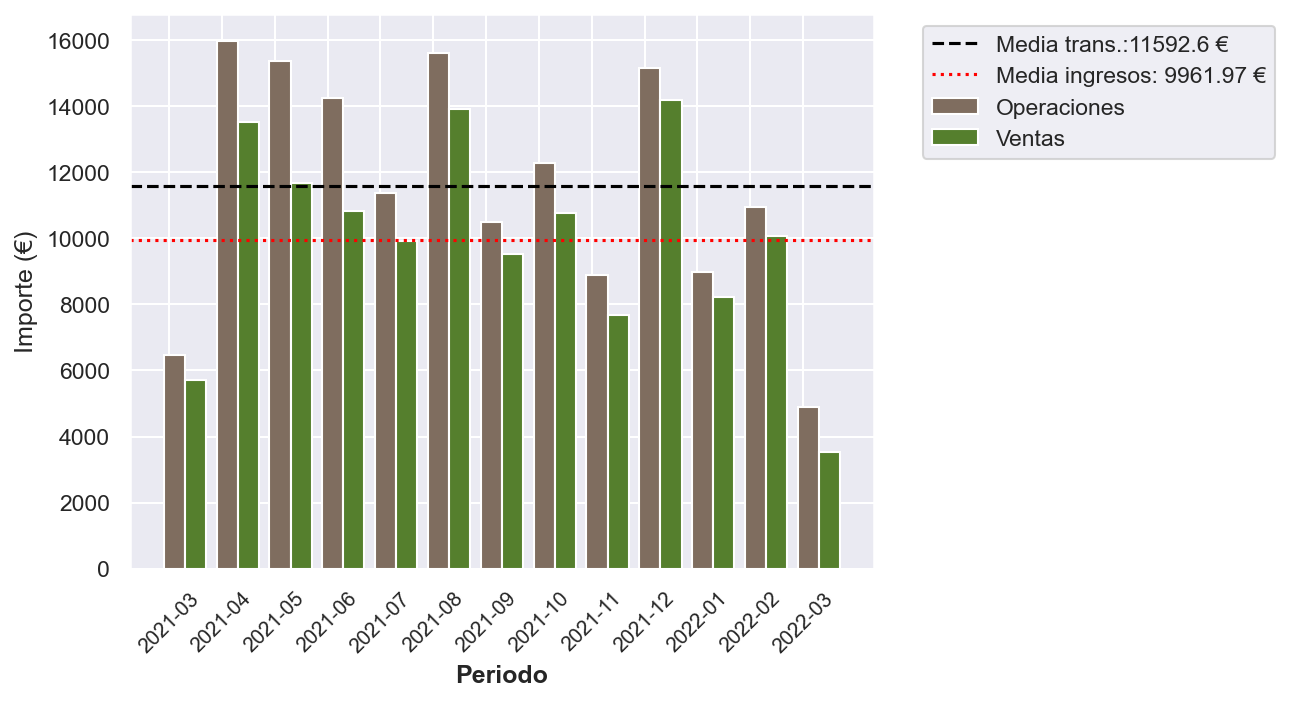

In [26]:
# Datos
barWidth = 0.4
bars1 = transacciones_mensuales.values
bars2 = ventas_mensuales.values


# Posición de las barras
r = np.arange(len(bars1))
r2 = r + barWidth

# Gráfica
fig, ax = plt.subplots(dpi=150)
ax.bar(r, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Operaciones')
ax.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Ventas')

# Xticks
ax.set_xlabel('Periodo', fontweight='bold')
ax.set_ylabel('Importe (€)')
ax.set_xticks(r + barWidth -0.5)
ax.set_xticklabels(transacciones_mensuales.index)
ax.tick_params(axis='x', labelrotation=45, labelsize='small')

# Medias
ax.axhline(y=media_transacciones, color='black', linestyle='--', label=f'Media trans.:{round(media_transacciones,2)} €')
ax.axhline(y=media_ventas, color='red', linestyle=':', label=f'Media ingresos: {round(media_ventas,2)} €')

# Legend
ax.legend(bbox_to_anchor=(1.05, 1), ncol=1, loc='upper left')

#ax.legend('Operaciones e ingresos por periodo')

### Ejercicio 5

##### Gráfico con dos variables categóricas

Vamos a ver cómo ha variado el número de transacciones declinadas a lo largo del tiempo.

In [27]:
df_transaction_declined = df_transaction[df_transaction['declined']==1].groupby('period', as_index=False).size()
df_transaction_declined

,period,size
0,2021-03,3
1,2021-04,11
2,2021-05,14
3,2021-06,11
4,2021-07,8
5,2021-08,7
6,2021-09,5
7,2021-10,5
8,2021-11,7
9,2021-12,3


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2021-03'),
  Text(1, 0, '2021-04'),
  Text(2, 0, '2021-05'),
  Text(3, 0, '2021-06'),
  Text(4, 0, '2021-07'),
  Text(5, 0, '2021-08'),
  Text(6, 0, '2021-09'),
  Text(7, 0, '2021-10'),
  Text(8, 0, '2021-11'),
  Text(9, 0, '2021-12'),
  Text(10, 0, '2022-01'),
  Text(11, 0, '2022-02'),
  Text(12, 0, '2022-03')])

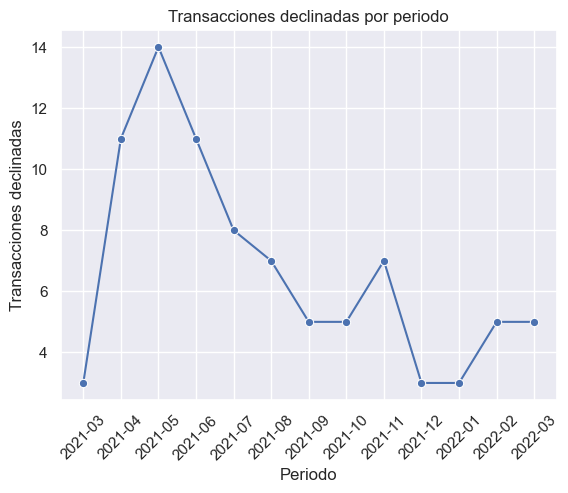

In [28]:
sns.lineplot(x=df_transaction_declined['period'].astype(str), y=df_transaction_declined['size'], marker='o', linestyle='-')

plt.title('Transacciones declinadas por periodo')
plt.ylabel('Transacciones declinadas')
plt.xlabel('Periodo')
plt.xticks(rotation=45)

Combinado con el gráfico anterior, vemos que el número de operaciones rechazadas afectó negativamente a los ingresos en los meses de abril, mayo y junio del 2021. A partir de julio, se tiene a mejorar el rendimiento de las transacciones, aunque con un pequeño repunte en los primeros meses del 2022 que requeriría atención por parte de la empresa.

### Ejercicio 6

##### Gráfico con tres variables

Vamos a ver las estadísticas de ventas por país y por tipo de transacción (aceptada o declinada)

In [29]:
#Unimos los dataframes 'transaction' y 'company'
df_company.rename(columns={'id': 'company_id'}, inplace=True)
df_transaction_country = pd.merge(df_transaction, df_company, on='company_id', how='inner')
df_transaction_country.head()

,id,credit_card_id,company_id,timestamp,amount,declined,product_ids,user_id,latitude,longitude,period,company_name,phone,email,country,website
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,2021-08,Lorem Eu Incorporated,01 83 66 62 07,enim.gravida.sit@hotmail.net,Canada,https://baidu.com/en-ca\r
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,2021-07,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0500,2022-01,Amet Nulla Donec Corporation,07 15 25 14 74,mattis.integer.eu@protonmail.net,Italy,https://netflix.com/sub/cars\r
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5560,2022-01,Non Institute,06 77 15 31 14,amet.metus@protonmail.couk,United Kingdom,https://guardian.co.uk/settings\r
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2980,2021-10,Ut Semper Foundation,01 60 36 33 06,consectetuer@google.ca,Sweden,https://ebay.com/settings\r


In [30]:
df_countries_agrup = df_transaction_country.groupby('country', as_index=False).size().sort_values('size', ascending=False)
df_countries_agrup

,country,size
5,Germany,118
13,United Kingdom,100
12,Sweden,79
10,Norway,68
6,Ireland,62
2,Canada,61
8,Netherlands,18
14,United States,17
7,Italy,17
1,Belgium,13


In [31]:
#Vamos a limitar la gráfica a los países con más de 20 operaciones, porque consideramos que la gráfica distorsiona los resultados para países con menos números de operaciones
df_countries_agrup[df_countries_agrup['size'] > 20]

,country,size
5,Germany,118
13,United Kingdom,100
12,Sweden,79
10,Norway,68
6,Ireland,62
2,Canada,61


In [32]:
lista_countries_top = df_countries_agrup[df_countries_agrup['size'] > 20]['country']
lista_countries_top

5            Germany
13    United Kingdom
12            Sweden
10            Norway
6            Ireland
2             Canada
Name: country, dtype: object

In [33]:
df_transaction_country_top = df_transaction_country[df_transaction_country['country'].isin(lista_countries_top)]
df_transaction_country_top.head()

,id,credit_card_id,company_id,timestamp,amount,declined,product_ids,user_id,latitude,longitude,period,company_name,phone,email,country,website
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,2021-08,Lorem Eu Incorporated,01 83 66 62 07,enim.gravida.sit@hotmail.net,Canada,https://baidu.com/en-ca\r
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,2021-07,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5560,2022-01,Non Institute,06 77 15 31 14,amet.metus@protonmail.couk,United Kingdom,https://guardian.co.uk/settings\r
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2980,2021-10,Ut Semper Foundation,01 60 36 33 06,consectetuer@google.ca,Sweden,https://ebay.com/settings\r
6,09DE92CE-6F27-2BB7-13B5-9385B2B3B8E2,CcU-3071,b-2298,2021-05-11 20:40:06,303.05,1,"67, 7",275,71.1706,10.5757,2021-05,Elit Etiam Laoreet Associates,07 69 74 17 45,ultrices@google.couk,Canada,https://yahoo.com/fr\r


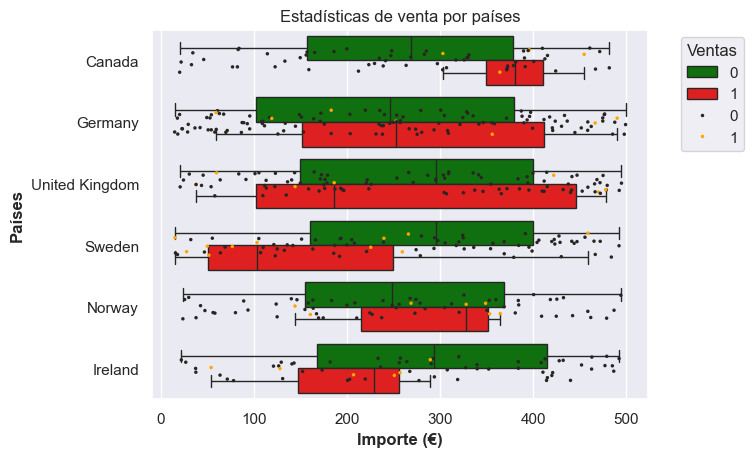

In [34]:
#Graficamos un boxplot para analizar las estadísticas por país y tipo de operación. Por encima, marcamos las operaciones por país para tener una referencia visual de la cantidad de operaciones de cada país:
custom_palette = {0: "green", 1: "red"}
sns.boxplot(y=df_transaction_country_top['country'], x=df_transaction_country_top['amount'], hue=df_transaction_country_top['declined'], palette=custom_palette)

# Añadimos un stripplot:
sns.stripplot(y='country', x='amount', hue='declined', data=df_transaction_country_top, palette="dark:orange", jitter=0.2, size=2.5)

plt.title("Estadísticas de venta por países", loc="center")
plt.ylabel('Países', fontweight='bold')
plt.xlabel('Importe (€)', fontweight='bold')

plt.legend(bbox_to_anchor=(1.05, 1), ncol=1, loc='upper left', title='Ventas')

Vemos que Alemania es el país con mayor número de transacciones. La mediana de sus transacciones es, junto a la de Noruega, de las más bajas, pero la distribución de importes, tanto en el interpercentil como el rango absoluto, es el más amplio. También en el caso de las transacciones declinadas, que, aunque no sean muchas, si se trabaja para corregir las causas, influiría muy positivamente en el balance.

En el caso de Canadá, vemos que las transacciones declinadas ocurren en operaciones importantes.

Irlanda es el país cuyas operaciones nos proporcionan mayor rendimiento.


### Ejercicio 7

##### Graficar un pairplot

Vamos a analizar las transacciones por importe, número de productos y edad del cliente. Para ello, vamos a añadir el número de productos adquiridos en la transacción usando la tabla intermedia 'transaction_products'

In [35]:
# Recuperamos la tabla 'transaction_products' del diccionario de dataframes:
df_tr_pr = dataframe['transaction_products']
df_tr_pr.rename(columns={'transaction_id': 'id'}, inplace=True)
df_tr_pr

,id,product_id
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,19
1,02C6201E-D90A-1859-B4EE-88D2986D3B02,1
2,02C6201E-D90A-1859-B4EE-88D2986D3B02,71
3,0466A42E-47CF-8D24-FD01-C0B689713128,43
4,0466A42E-47CF-8D24-FD01-C0B689713128,97
...,...,...
1452,FD89D51B-AE8D-77DC-E450-B8083FBD3187,3
1453,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,37
1454,FE809ED4-2DB6-55AC-C915-929516E4646B,43
1455,FE809ED4-2DB6-55AC-C915-929516E4646B,23


In [36]:
# Creamos un dataframe a partir del recuento de productos por transacción:
df_products_by_transaction = df_tr_pr.groupby('id', as_index=False).count()
df_products_by_transaction

,id,product_id
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,3
1,0466A42E-47CF-8D24-FD01-C0B689713128,3
2,063FBA79-99EC-66FB-29F7-25726D1764A5,4
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,3
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,2
...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,4
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,4
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,1
585,FE809ED4-2DB6-55AC-C915-929516E4646B,2


In [37]:
#Añadimos el dato a la tabla:
df_products_by_transaction.rename(columns={'product_id':'prods_x_trans'}, inplace=True)
df_transaction_user_products = pd.merge(df_transaction_user, df_products_by_transaction, on='id', how='inner')
df_transaction_user_products.head()

,id,credit_card_id,company_id,timestamp,amount,declined,product_ids,user_id,latitude,longitude,...,surname,phone,email,birth_date,country,city,postal_code,address,age,prods_x_trans
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,...,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",40,3
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,...,Benjamin,0800 1111,porttitor@icloud.ca,1987-05-15,United Kingdom,Coldstream,KY0 0DY,662-8112 Praesent Av.,37,3
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0500,...,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,1982-08-03,Canada,Richmond,R8H 2K2,8564 Facilisi. St.,42,4
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5560,...,Keith,022-178-1548,arcu.eu@protonmail.org,1999-01-10,Canada,Oliver,B5T 7L6,"P.O. Box 289, 3192 Cursus St.",26,3
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2980,...,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",40,2


In [38]:
df_transaction_user_products.describe()

,timestamp,amount,declined,latitude,longitude,birth_date,age,prods_x_trans
count,587,587.000000,587.000000,587.000000,587.000000,587,587.000000,587.000000
mean,2021-09-06 14:56:16.795570688,256.735520,0.148211,0.672389,-4.469083,1990-01-05 10:45:10.732538368,34.616695,2.482112
min,2021-03-17 02:55:49,15.050000,0.000000,-89.824800,-179.366000,1979-04-30 00:00:00,23.000000,1.000000
25%,2021-06-02 05:14:58.500000,131.115000,0.000000,-44.024000,-98.952450,1984-09-21 00:00:00,32.000000,2.000000
50%,2021-08-27 10:25:34,257.440000,0.000000,1.402780,-5.964040,1991-04-16 00:00:00,33.000000,2.000000
75%,2021-12-13 08:24:48,389.900000,0.000000,44.870100,88.348400,1992-07-24 12:00:00,40.000000,3.000000
max,2022-03-16 14:01:36,499.230000,1.000000,89.921200,179.950000,2001-02-19 00:00:00,45.000000,4.000000
std,NaN,144.133895,0.355612,51.485399,106.625421,NaN,5.850929,0.986740


Text(0.5, 1.02, 'Relación entre edad, n.º productos e importe')

<Figure size 1000x500 with 0 Axes>

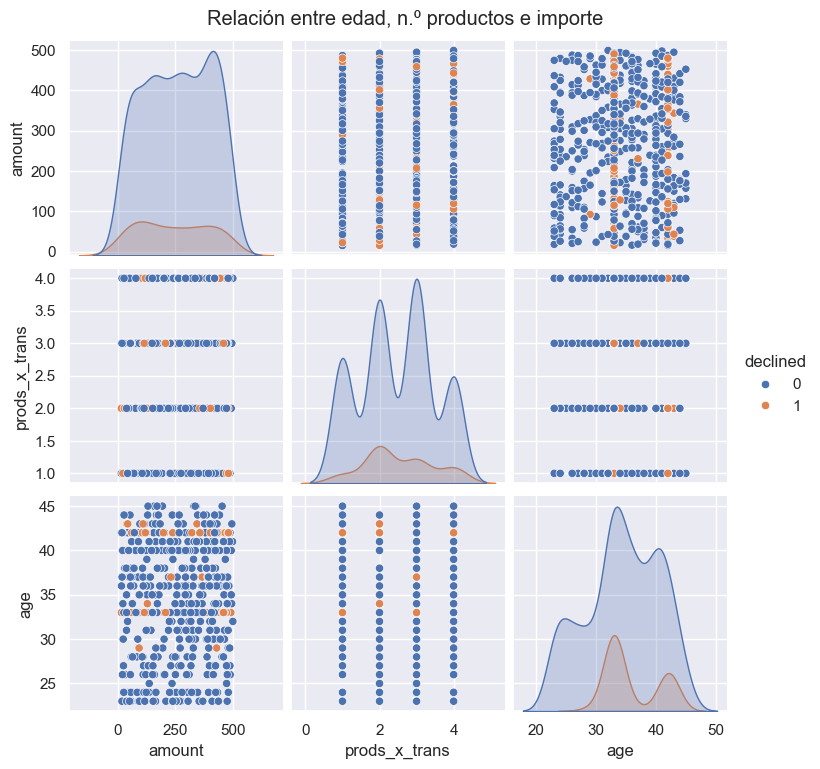

In [39]:
# Trazamos el pairplot
plt.figure(figsize=(10,5), layout='constrained')
g = sns.pairplot(df_transaction_user_products, vars=['amount', 'prods_x_trans', 'age'], hue='declined', diag_kind='kde')
g.fig.suptitle('Relación entre edad, n.º productos e importe', y=1.02)


Apreciamos que no hay una relación entre el número de productos por transacción con el importe de la transacción y la edad, así tampoco entre la edad con el importe. Sí que percibimos que la mayoría de nuestros usuarios se sitúa entre los 30 y los 40 años.

## Nivel 2



### Ejercicio 1

Correlación de todas las variables numéricas

In [40]:
df_tr_pr.head()

,id,product_id
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,19
1,02C6201E-D90A-1859-B4EE-88D2986D3B02,1
2,02C6201E-D90A-1859-B4EE-88D2986D3B02,71
3,0466A42E-47CF-8D24-FD01-C0B689713128,43
4,0466A42E-47CF-8D24-FD01-C0B689713128,97


In [41]:
df_product.head()

,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4
1,10,Karstark Dorne,119.52,#f4f4f4,2.4,WH--5
2,100,south duel,40.43,#6d6d6d,3.0,WH--95
3,11,Karstark Dorne,49.70,#141414,2.7,WH--6
4,12,duel Direwolf,181.60,#a8a8a8,2.1,WH--7


In [42]:
df_product.rename(columns={'id': 'product_id'}, inplace=True)
df_tr_pr_weight = pd.merge(df_tr_pr, df_product, on='product_id', how='left')
df_tr_pr_weight.head()

,id,product_id,product_name,price,colour,weight,warehouse_id
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,19,dooku solo,60.33,#3f3f3f,0.6,WH--14
1,02C6201E-D90A-1859-B4EE-88D2986D3B02,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4
2,02C6201E-D90A-1859-B4EE-88D2986D3B02,71,Tully Dorne,103.73,#424242,2.7,WH--66
3,0466A42E-47CF-8D24-FD01-C0B689713128,43,duel,59.80,#5b5b5b,0.6,WH--38
4,0466A42E-47CF-8D24-FD01-C0B689713128,97,jinn Winterfell,65.25,#bababa,1.0,WH--92


In [43]:
df_tr_pr_weight.describe()

,price,weight
count,1457.000000,1457.0000
mean,105.669966,1.8407
std,54.923285,1.0557
min,9.240000,0.6000
25%,60.330000,1.0000
50%,103.730000,1.5000
75%,161.110000,2.7000
max,195.940000,3.2000


In [44]:
#Agrupamos por la id de la transacción para obtener el número de artículos y el peso total del envío
group_df_tr_pr_weight = df_tr_pr_weight.groupby('id')
group_df_tr_pr_weight.describe()

price                                 \
                                     count        mean        std     min   
id                                                                          
02C6201E-D90A-1859-B4EE-88D2986D3B02   3.0  108.390000  50.551348   60.33   
0466A42E-47CF-8D24-FD01-C0B689713128   3.0   69.066667  11.653576   59.80   
063FBA79-99EC-66FB-29F7-25726D1764A5   4.0  133.582500  58.619273   82.15   
0668296C-CDB9-A883-76BC-2E4C44F8C8AE   3.0  110.716667  75.607365   26.51   
06CD9AA5-9B42-D684-DDDD-A5E394FEBA99   2.0   72.410000  17.833233   59.80   
...                                    ...         ...        ...     ...   
FD2E8957-414B-BEEC-E9AD-59AA7A8A6290   4.0   88.627500  62.157956   26.51   
FD89D51B-AE8D-77DC-E450-B8083FBD3187   4.0  113.892500  74.067106    9.24   
FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65   1.0   26.660000        NaN   26.66   
FE809ED4-2DB6-55AC-C915-929516E4646B   2.0  114.880000  77.894883   59.80   
FE96CE47-BD59-381C-4E18-E3CA3D44E8FF   1.0  171.130000        NaN  171.13   

                                                                          \
                                           25%     50%       75%     max   
id                                                                         
02C6201E-D90A-1859-B4EE-88D2986D3B02   82.0300  103.73  132.4200  161.11   
0466A42E-47CF-8D24-FD01-C0B689713128   62.5250   65.25   73.7000   82.15   
063FBA79-99EC-66FB-29F7-25726D1764A5   84.3025  128.12  177.4000  195.94   
0668296C-CDB9-A883-76BC-2E4C44F8C8AE   79.6850  132.86  152.8200  172.78   
06CD9AA5-9B42-D684-DDDD-A5E394FEBA99   66.1050   72.41   78.7150   85.02   
...                                        ...     ...       ...     ...   
FD2E8957-414B-BEEC-E9AD-59AA7A8A6290   54.1250   77.61  112.1125  172.78   
FD89D51B-AE8D-77DC-E450-B8083FBD3187   87.8775  137.60  163.6150  171.13   
FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65   26.6600   26.66   26.6600   26.66   
FE809ED4-2DB6-55AC-C915-929516E4646B   87.3400  114.88  142.4200  169.96   
FE96CE47-BD59-381C-4E18-E3CA3D44E8FF  171.1300  171.13  171.1300  171.13   

                                     weight                                  \
                                      count      mean       std  min    25%   
id                                                                            
02C6201E-D90A-1859-B4EE-88D2986D3B02    3.0  1.433333  1.115049  0.6  0.800   
0466A42E-47CF-8D24-FD01-C0B689713128    3.0  1.433333  1.115049  0.6  0.800   
063FBA79-99EC-66FB-29F7-25726D1764A5    4.0  1.775000  1.372042  0.6  0.600   
0668296C-CDB9-A883-76BC-2E4C44F8C8AE    3.0  2.166667  1.379613  0.6  1.650   
06CD9AA5-9B42-D684-DDDD-A5E394FEBA99    2.0  0.600000  0.000000  0.6  0.600   
...                                     ...       ...       ...  ...    ...   
FD2E8957-414B-BEEC-E9AD-59AA7A8A6290    4.0  2.425000  1.239287  0.6  2.175   
FD89D51B-AE8D-77DC-E450-B8083FBD3187    4.0  1.375000  0.478714  1.0  1.000   
FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65    1.0  1.000000       NaN  1.0  1.000   
FE809ED4-2DB6-55AC-C915-929516E4646B    2.0  1.650000  1.484924  0.6  1.125   
FE96CE47-BD59-381C-4E18-E3CA3D44E8FF    1.0  1.500000       NaN  1.5  1.500   

                                                        
                                       50%    75%  max  
id                                                      
02C6201E-D90A-1859-B4EE-88D2986D3B02  1.00  1.850  2.7  
0466A42E-47CF-8D24-FD01-C0B689713128  1.00  1.850  2.7  
063FBA79-99EC-66FB-29F7-25726D1764A5  1.65  2.825  3.2  
0668296C-CDB9-A883-76BC-2E4C44F8C8AE  2.70  2.950  3.2  
06CD9AA5-9B42-D684-DDDD-A5E394FEBA99  0.60  0.600  0.6  
...                                    ...    ...  ...  
FD2E8957-414B-BEEC-E9AD-59AA7A8A6290  2.95  3.200  3.2  
FD89D51B-AE8D-77DC-E450-B8083FBD3187  1.25  1.625  2.0  
FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65  1.00  1.000  1.0  
FE809ED4-2DB6-55AC-C915-929516E4646B  1.65  2.175  2.7  
FE96CE47-BD59-381C-4E18-E3CA3D44E8FF  1.50  1

In [45]:
# Vamos a reducir este dataframe a id, precio y peso antes de agregarlo a la tabla 'transaction'
df_tr_pr_weight_aggr = df_tr_pr_weight.pivot_table(index='id', values=['price', 'weight'], aggfunc=['sum'])
df_tr_pr_weight_aggr

sum       
                                       price weight
id                                                 
02C6201E-D90A-1859-B4EE-88D2986D3B02  325.17    4.3
0466A42E-47CF-8D24-FD01-C0B689713128  207.20    4.3
063FBA79-99EC-66FB-29F7-25726D1764A5  534.33    7.1
0668296C-CDB9-A883-76BC-2E4C44F8C8AE  332.15    6.5
06CD9AA5-9B42-D684-DDDD-A5E394FEBA99  144.82    1.2
...                                      ...    ...
FD2E8957-414B-BEEC-E9AD-59AA7A8A6290  354.51    9.7
FD89D51B-AE8D-77DC-E450-B8083FBD3187  455.57    5.5
FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65   26.66    1.0
FE809ED4-2DB6-55AC-C915-929516E4646B  229.76    3.3
FE96CE47-BD59-381C-4E18-E3CA3D44E8FF  171.13    1.5

[587 rows x 2 columns]

In [46]:
df_transaction_user_pr_wh = pd.merge(df_transaction_user_products, df_tr_pr_weight_aggr['sum'], on='id', how='left')
df_transaction_user_pr_wh.head()

,id,credit_card_id,company_id,timestamp,amount,declined,product_ids,user_id,latitude,longitude,...,email,birth_date,country,city,postal_code,address,age,prods_x_trans,price,weight
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,...,vitae.aliquet@outlook.edu,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",40,3,325.17,4.3
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,...,porttitor@icloud.ca,1987-05-15,United Kingdom,Coldstream,KY0 0DY,662-8112 Praesent Av.,37,3,207.20,4.3
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0500,...,convallis.ante.lectus@yahoo.com,1982-08-03,Canada,Richmond,R8H 2K2,8564 Facilisi. St.,42,4,534.33,7.1
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5560,...,arcu.eu@protonmail.org,1999-01-10,Canada,Oliver,B5T 7L6,"P.O. Box 289, 3192 Cursus St.",26,3,332.15,6.5
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2980,...,vitae.aliquet@outlook.edu,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",40,2,144.82,1.2


In [47]:
#Nos quedamos con las variables numéricas:
df_transaction_user_pr_wh_subset = df_transaction_user_pr_wh[['amount', 'age', 'prods_x_trans', 'price', 'weight']]
df_transaction_user_pr_wh_subset.head()

,amount,age,prods_x_trans,price,weight
0,466.92,40,3,325.17,4.3
1,49.53,37,3,207.20,4.3
2,92.61,42,4,534.33,7.1
3,394.18,26,3,332.15,6.5
4,279.93,40,2,144.82,1.2


In [48]:
df_transaction_user_pr_wh_subset.corr()

,amount,age,prods_x_trans,price,weight
amount,1.000000,0.035988,0.007070,0.017515,-0.011021
age,0.035988,1.000000,0.007530,0.029213,0.017468
prods_x_trans,0.007070,0.007530,1.000000,0.776632,0.744327
price,0.017515,0.029213,0.776632,1.000000,0.669312
weight,-0.011021,0.017468,0.744327,0.669312,1.000000


[Text(0, 0.5, 'Importe'),
 Text(0, 1.5, 'Edad'),
 Text(0, 2.5, 'N.º prods.'),
 Text(0, 3.5, 'Precio'),
 Text(0, 4.5, 'Peso')]

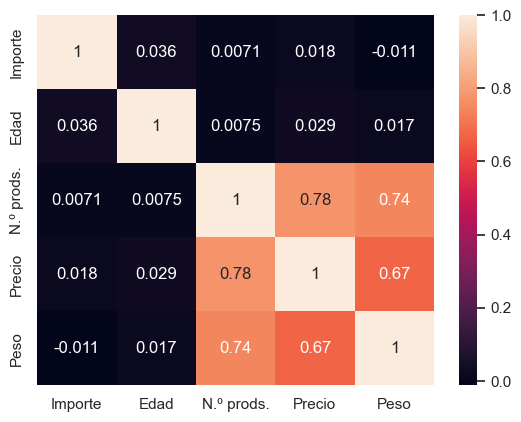

In [49]:
g = sns.heatmap(df_transaction_user_pr_wh_subset[['amount','age','prods_x_trans','price', 'weight']].corr(), annot=True)
g.set_xticklabels(['Importe', 'Edad', 'N.º prods.', 'Precio', 'Peso'])
g.set_yticklabels(['Importe', 'Edad', 'N.º prods.', 'Precio', 'Peso'])

Existe una correlación fuerte (y lógica) entre el número de productos del pedido y el precio total de los artículos; también hay una correlación bastante acusada entre el precio total de los productos y el peso. Ya vimos en gráficas anteriores que no hay relación entre edad e importe de las transacciones; tampoco entre el precio total de los artículos, la cantidad por envío y el peso, lógico teniendo en cuenta la dispersión entre la edad y los importes.
La correlación negativa entre importe y precio total de los artículos viene de los descuentos o los importes cobrados a los usuarios, ya sea por descuentos o por comisiones.

### Ejercicio 2

##### Implementa un jointplot

Text(34.875, 0.5, 'Precio envío')

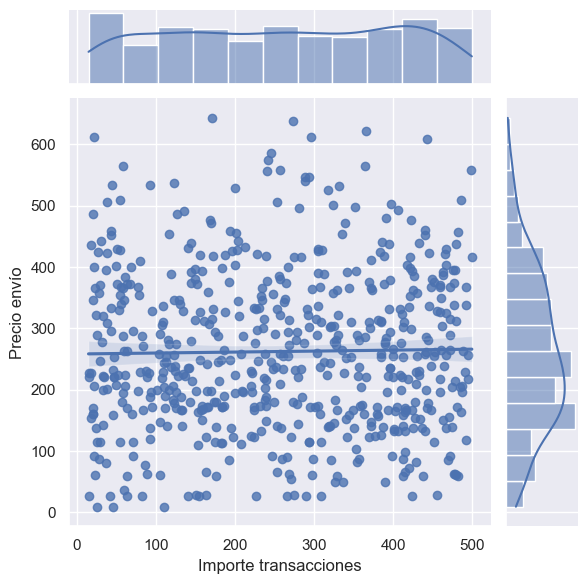

In [50]:
sns.jointplot(data=df_transaction_user_pr_wh, x='amount', y='price', kind='reg')
plt.xlabel('Importe transacciones')
plt.ylabel('Precio envío')

Vemos que no hay relación entre el importe de la transacción y la suma del precio de los productos. Percibimos que existen bastantes transacciones con importe bajo (menos de cincuenta euros), y que se acostumbra a realizar pedidos de productos cuyo precio total de venta se sitúa entre los 150 y 250 dólares.

## Nivel 3

### Ejercicio 1

##### Implementa un violinplot combinado con otro tipo de gráfica.

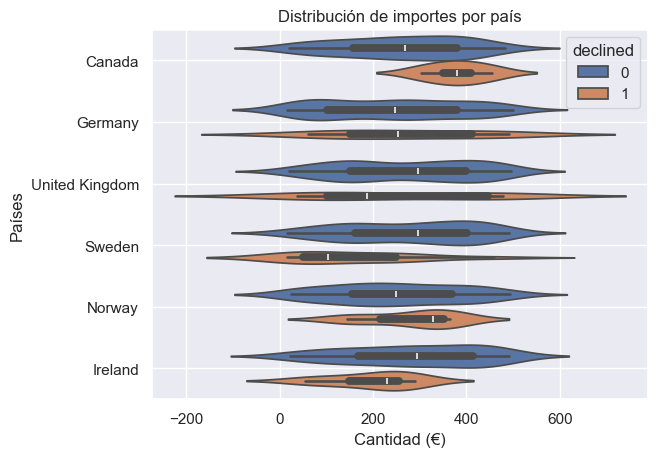

In [51]:
# Graficamos el violinplot. Vemos que nos incluye el boxplot:
ax = sns.violinplot(y=df_transaction_country_top['country'], x=df_transaction_country_top['amount'], hue=df_transaction_country_top['declined'])
plt.title('Distribución de importes por país')

ax.set_xlabel('Cantidad (€)')
ax.set_ylabel('Países')

ax.grid(axis='y')
ax.set_axisbelow(True)


Text(0.5, 1.0, 'Distribución de importes por país')

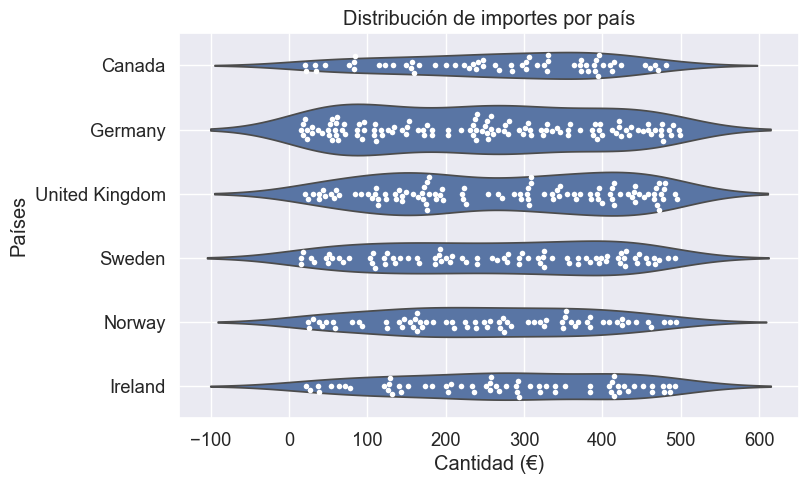

In [52]:
#Vamos a añadir un swarmplot por encima para situar los valores de las transacciones

# Creamos la figura:
sns.set_context('notebook', font_scale=1.2)
fig, ax = plt.subplots(figsize=(8,5))

# Dibujamos el violin
ax = sns.violinplot(y="country", 
                  x="amount", 
                  data=df_transaction_country_top,
                  density_norm='count',
                  inner=None
              )
              

# Situamos por encima el swarmplot 
ax = sns.swarmplot(y="country",
                   x="amount",
                   data=df_transaction_country_top,
                   color="white", 
                   edgecolor="auto",
                   s=4, # Circle size
             )


ax.set_xlabel('Cantidad (€)')
ax.set_ylabel('Países')

ax.grid(axis='y')
ax.set_axisbelow(True)

plt.title('Distribución de importes por país')

Percibimos la importancia de Alemania y Reino Unido en número de transacciones realizadas. Nos interesaría poner en marcha acciones en Alemania para aumentar el importe de las transacciones más baratas.

### Ejercicio 2

##### Genera un FacetGrid para visualizar múltiples aspectos de los datos simultáneamente.

Vamos a ver la evolución de las transacciones por periodo.

In [53]:
df_transaction_user_pr_wh['period'] = df_transaction_user_pr_wh['timestamp'].dt.to_period('M')
df_transaction_user_pr_wh['month'] = df_transaction_user_pr_wh['timestamp'].dt.month
df_transaction_user_pr_wh['year'] = df_transaction_user_pr_wh['timestamp'].dt.year
df_transaction_user_pr_wh.head()

,id,credit_card_id,company_id,timestamp,amount,declined,product_ids,user_id,latitude,longitude,...,city,postal_code,address,age,prods_x_trans,price,weight,period,month,year
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,...,Bozeman,61871,"P.O. Box 712, 7907 Est St.",40,3,325.17,4.3,2021-08,8,2021
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,...,Coldstream,KY0 0DY,662-8112 Praesent Av.,37,3,207.20,4.3,2021-07,7,2021
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0500,...,Richmond,R8H 2K2,8564 Facilisi. St.,42,4,534.33,7.1,2022-01,1,2022
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5560,...,Oliver,B5T 7L6,"P.O. Box 289, 3192 Cursus St.",26,3,332.15,6.5,2022-01,1,2022
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2980,...,Bozeman,61871,"P.O. Box 712, 7907 Est St.",40,2,144.82,1.2,2021-10,10,2021


In [54]:
df_transaction_user_pr_wh.dtypes

id                        object
credit_card_id            object
company_id                object
timestamp         datetime64[ns]
amount                   float64
declined                   int64
product_ids               object
user_id                   object
latitude                 float64
longitude                float64
name                      object
surname                   object
phone                     object
email                     object
birth_date        datetime64[ns]
country                   object
city                      object
postal_code               object
address                   object
age                        int64
prods_x_trans              int64
price                    float64
weight                   float64
period                 period[M]
month                      int32
year                       int32
dtype: object

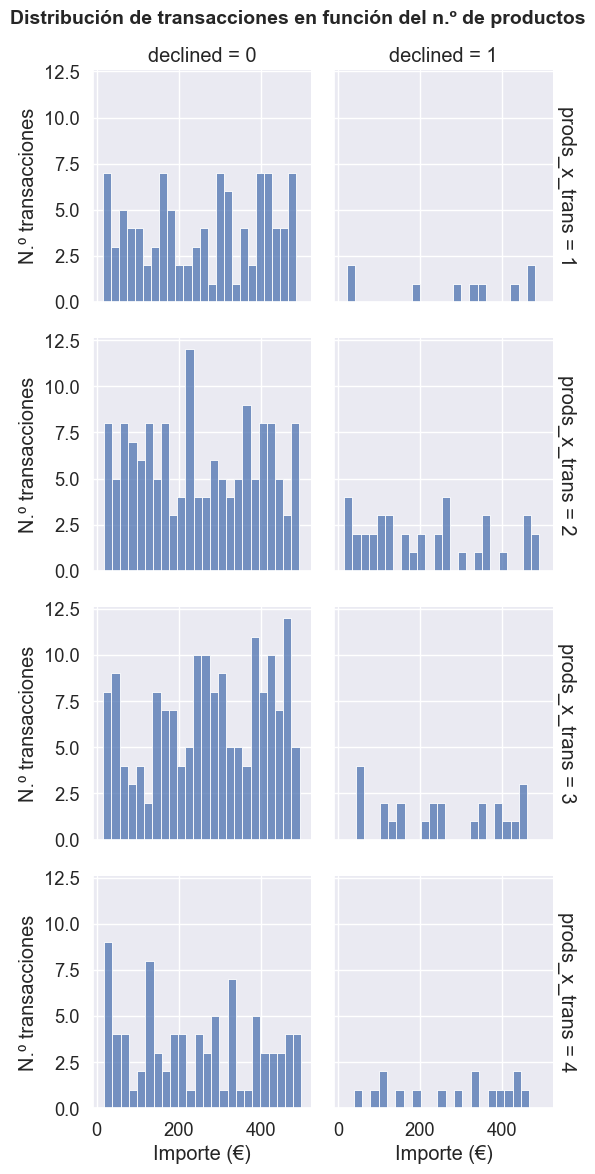

In [55]:
g = sns.FacetGrid(df_transaction_user_pr_wh, col='declined', row='prods_x_trans', margin_titles=True)
g.map_dataframe(sns.histplot, x='amount', binwidth=20)
g.fig.suptitle("Distribución de transacciones en función del n.º de productos", fontsize=14, fontweight='bold')
g.fig.subplots_adjust(top=.93)
g.set_axis_labels('Importe (€)', 'N.º transacciones')
#g.set_titles(fontsize='small')

Vemos que los pedidos con cuatro artículos no son muy habituales, y que, curiosamente, se repiten más en transacciones con menos ingresos, ya sea por compras esporádicas de clientes que se deciden por artículos más baratos, o bien por parte de clientes con grandes descuentos.